# Gradient Boosting

> NOTE: Gradient boosting, like bagging or ensembeling, is a technique that be applied to any machine learning model. However, it is almost always applied to Decision Trees in practice. As such, this notebook has limited its discussion of gradient boosting to the context of Decision trees.

Gradient boosting is an alternative method to ensembleing for combining several individual machine learning models into a single predicitive system. However, instead of training several independent models and then combining all of their predictions into one, as we do in a Random Forest, with gradient boosting we build and apply several models *in series.* That is, we first build and train a single model. Then, we train a second model using the first model's error as the labels.

It might sound crazy at first blush, but gradient boosted models are currently the state of the art for many ML applications.

## The Intuition:

Suppose we have an underlying function like this, that we'd like to approximate:

![](https://explained.ai/gradient-boosting/images/L2-loss/L2-loss_additive_2.svg)

Gradient boostings approach to this is to iteratively add functions together. That might look like this:

![](https://explained.ai/gradient-boosting/images/L2-loss/L2-loss_additive_3.svg)

The first function gets us the proper y-intercet. The second gets us closer by more or less fitting a regression line to the wavey line. The third adds in waveyness through the use of the sine function. 

>Images from: https://explained.ai/gradient-boosting/L2-loss.html

Gradient boosting as a mechanic is based on this idea: That we can add functions that iteratively get us closer to the goal. Generally speaking for Gradient Boosting, these individual functions are simple, and often refered to as "weak learners." 

In practice that means decision trees with a limited max depth, limited max number of leaf nodes, or other regularization mechanics. The use of weak learners helps gradient boosting avoid overfitting. 

## The Mechanics:

The way gradient boosting achieves this goal is pretty clever. When we train the first model in the sequence, we train then compute the residuals of that model. For example, suppose we had these labels and predictions:

```
Predi:  [2,  3,  5]
Label:  [1,  2,  6]
Resid:  [-1, -1, 1] 
```

Now, when we build the second model we actually train it with these residuals as the target values. 

**Why?**

Well, if we could perfectly predict the residuals, we could simply negate and add those values to our original predictions and viola, we'd have a perfect model. That is to say we'd have a model such that f1(x) + f2(x) = y.

In practice gradient boosting generally takes many more than 2 models to produce high quality predictions, but each time the process is the same: Compute the residuals of the entire chain of functions so far, train a new model on those residuals, and (hopefully) get closer to the truth.

## A Few Additional Details

* Modern implementations of Gradient Boosting support the use of a variety of "loss functions" to compute the residuals, meaning you may not always be using the simple subtraction of the predictions and labels. 
    * These loss functions often have mathematical properties that make them more useful.
    * Examples: MSE, Cross Entropy, Log Loss.
    
* Many implementations use only the direction of the residuals in conjunction with a fixed learning rate, rather than using the value of the residuals directly.
    * This is to help our model take consisent small steps in the direction of the solution, rather than large jumps.
    * Generally, the smaller the learning rate, the more learners you need. 
    * But also generally, the smaller the learning rate and larger the number of learners the better overall performance. 
    
* Gradient boosting is similar in many ways to Gradient descent — an algorithm used to train Neural Networks.
    * More on that later in this series!
    
* Hyperparameter tuning is more important to gradient boosting than many other ML algorithms, and without proper tuning the model can be prone to overfitting.
* Additionally, there are a number of new and unique hyperparameters
    * Loss function.
    * Learning rate.
    * Number of learners.
    
* Gradient Boosting is often slower to train, because there are dependnecies between each model. We can't train the second model until the first is fit.
    
* Other model types, such as AdaBoost, use very similar ideas: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    

## Simple Application

Now we'll demo a simple application of gradient boosted classifiers and regressors.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Load the data
heart_dataset = pd.read_csv('../datasets/uci-heart-disease/heart.csv')

# Split the data into input and labels
labels = heart_dataset['target']
input_data = heart_dataset.drop(columns=['target'])

# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

model = GradientBoostingClassifier()
model.fit(training_data, training_labels)
model.score(test_data, test_labels)

0.8360655737704918

<AxesSubplot:>

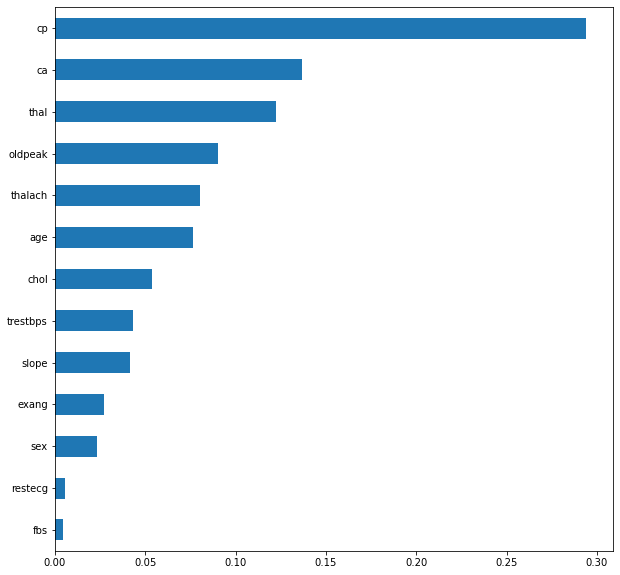

In [10]:
# We can still get the feature importances:
feat_importances = pd.Series(model.feature_importances_, index=training_data.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,10))

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Load the data
fish_dataset = pd.read_csv('../datasets/fish/Fish.csv')

# Split the data into input and labels — we're trying to predict fish weight based on 
# its size and species
labels = fish_dataset['Weight']
input_data = fish_dataset.drop(columns=['Weight'])

# We have one categorical parameter, so lets tell pandas to one-hot encode this value.
input_data = pd.get_dummies(input_data, columns=['Species'])

# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

model = GradientBoostingRegressor()
model.fit(training_data, training_labels)
model.score(test_data, test_labels)

0.9354102856146238

<AxesSubplot:>

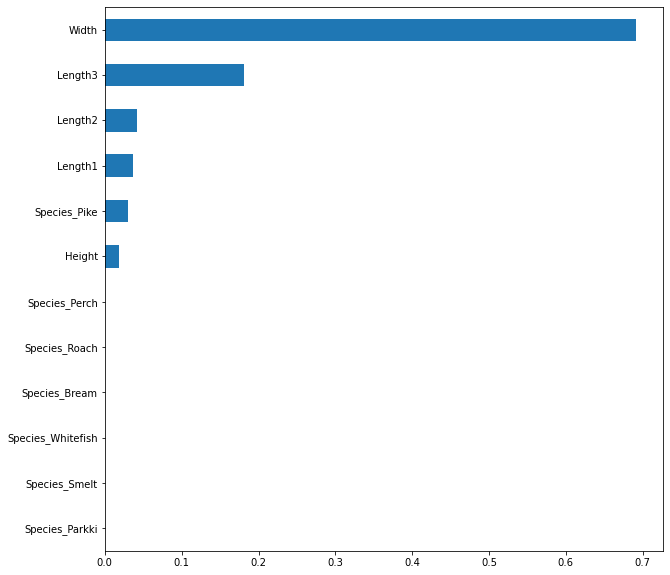

In [12]:
# We can still get the feature importances:
feat_importances = pd.Series(model.feature_importances_, index=training_data.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,10))

# Gradient Boosting Exercise

Construct code to perform a grid search on your choice of a gradient boosted classifier or regressor. Similar to the previous exercise, try at least 3 parameter choices for every hyperparamter that allows it!

In [5]:
# Your Code Here

In [6]:
# Don't look....

In [7]:
# Warning, this grid search took a pretty long time....

In [13]:
from sklearn.model_selection import GridSearchCV

# Load the data
heart_dataset = pd.read_csv('../datasets/uci-heart-disease/heart.csv')

# Split the data into input and labels
labels = heart_dataset['target']
input_data = heart_dataset.drop(columns=['target'])

# Note, we don't split the data. GridSearchCV will automatically apply 5-fold cross validation by default.


# Note, leaving out class_weights because our data is pretty balanced. 
tuned_parameters = {
    'n_estimators': [10, 50, 100], # Boosting is not like RF... 10 and 50 might do better by avoiding overfitting
    'subsample': [1, .7, .5, .3], # I think .5 or .7 will do well.
    'learning_rate': [.05, .1, .2, .5], # Hard to say, this interacts heavily with n_estimators so ... it's not obvious.
    'criterion': ['squared_error', 'friedman_mse'], # Not sure what will win out here TBH.
    'max_depth': [None, 3, 5, 10], # 3 or 5 is probably best, GB wants "weak" learners
    'min_samples_split': [2, 15, 30], # 2 gives the model the most power to overfit, but I think it will win.
    'max_features':[None, 'sqrt', 'log2'], # Torn here. I kind of think None will be best since the num splits is already limited.
    'max_leaf_nodes': [None, 4, 8, 20], # Unlike RF, 4 might be okay here. 4 or 8 I think.
}

# These two lines will result in every possible combo of the above paramters to be fit and scored
# which can take a LONG TIME with large datasets.
clf = GradientBoostingClassifier()
grid_tree = GridSearchCV(clf, tuned_parameters)
grid_tree.fit(input_data, labels) 

print("Best parameters set found on development set:")
print()
print(grid_tree.best_params_, grid_tree.best_score_)
print()
print("Grid scores on development set:")
print()
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_tree.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'min_samples_split': 15, 'n_estimators': 50, 'subsample': 0.3} 0.8645355191256832

Grid scores on development set:

0.752 (+/-0.126) for {'criterion': 'squared_error', 'learning_rate': 0.05, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 1}
0.769 (+/-0.091) for {'criterion': 'squared_error', 'learning_rate': 0.05, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.7}
0.792 (+/-0.078) for {'criterion': 'squared_error', 'learning_rate': 0.05, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.5}
0.799 (+/-0.045) for {'criterion': 'squared_error', 'learning_rate': 0.05, 'max_depth': None, 'max_features': None, 'ma

0.812 (+/-0.079) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.5}
0.808 (+/-0.130) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.3}
0.838 (+/-0.078) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 1}
0.832 (+/-0.088) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.7}
0.818 (+/-0.090) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.5}
0.825 (

0.805 (+/-0.048) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 0.5}
0.802 (+/-0.086) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 0.3}
0.799 (+/-0.108) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 50, 'subsample': 1}
0.815 (+/-0.024) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 50, 'subsample': 0.7}
0.815 (+/-0.045) for {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 50, 'subsample': 0.5}
0.

0.835 (+/-0.070) for {'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.7}
0.792 (+/-0.088) for {'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.5}
0.805 (+/-0.050) for {'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.3}
0.825 (+/-0.092) for {'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1}
0.792 (+/-0.074) for {'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.7}
0.818 (+/-0.077) for {

0.825 (+/-0.047) for {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.7}
0.782 (+/-0.068) for {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.5}
0.772 (+/-0.122) for {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.3}
0.792 (+/-0.086) for {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 1}
0.798 (+/-0.084) for {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.7}
0.766 (+/-0.

0.822 (+/-0.055) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.5}
0.822 (+/-0.059) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.3}
0.802 (+/-0.110) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}
0.818 (+/-0.083) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
0.828 (+/-0.076) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.5}
0.831 (+/-0.089) for {'c

0.825 (+/-0.093) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
0.822 (+/-0.084) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.5}
0.835 (+/-0.057) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.3}
0.835 (+/-0.098) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 1}
0.795 (+/-0.092) for {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 0.7}
0.

0.825 (+/-0.126) for {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 100, 'subsample': 0.3}
0.841 (+/-0.069) for {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 1}
0.815 (+/-0.072) for {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.7}
0.808 (+/-0.087) for {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.5}
0.822 (+/-0.088) for {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.3}
0.822 (+/-0.088)

0.812 (+/-0.090) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 15, 'n_estimators': 100, 'subsample': 0.3}
0.805 (+/-0.067) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 1}
0.792 (+/-0.071) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.7}
0.818 (+/-0.076) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0.5}
0.812 (+/-0.077) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 30, 'n_estimators': 10, 'subsample': 0

0.812 (+/-0.063) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
0.802 (+/-0.108) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.5}
0.815 (+/-0.070) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.3}
0.831 (+/-0.070) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 1}
0.812 (+/-0.047) for {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_split': 15, 'n_estimators': 10, 'subsample': 0.7}
0.822 (+/-0.

0.822 (+/-0.073) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 1}
0.815 (+/-0.070) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.7}
0.799 (+/-0.069) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.5}
0.696 (+/-0.162) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 50, 'subsample': 0.3}
0.782 (+/-0.107) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 100, 'subsample': 1}
0.779 (+/-0.088) f

0.798 (+/-0.098) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 100, 'subsample': 0.7}
0.762 (+/-0.246) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 100, 'subsample': 0.5}
0.687 (+/-0.056) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_split': 30, 'n_estimators': 100, 'subsample': 0.3}
0.808 (+/-0.075) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 1}
0.772 (+/-0.058) for {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.7}
0.789 (+/

In [14]:
results = pd.DataFrame({'mean_accuracy': means, 'std': stds})
params_df = pd.DataFrame(grid_tree.cv_results_['params'], columns=grid_tree.cv_results_['params'][0].keys())
all_results = pd.concat([results, params_df], axis=1)
sorted_performances = all_results.sort_values('mean_accuracy', ascending=False)

sorted_performances.head(5)

,mean_accuracy,std,criterion,learning_rate,max_depth,max_features,max_leaf_nodes,min_samples_split,n_estimators,subsample
7975,0.864536,0.032626,friedman_mse,0.05,5.0,sqrt,4.0,15,50,0.3
4647,0.858033,0.035566,squared_error,0.20,5.0,log2,4.0,2,10,0.3
3203,0.857923,0.034569,squared_error,0.10,10.0,sqrt,NaN,30,100,0.3
1453,0.857923,0.025643,squared_error,0.05,10.0,sqrt,NaN,15,10,0.7
11004,0.857923,0.049313,friedman_mse,0.20,3.0,sqrt,4.0,30,10,1.0


In [15]:
sorted_performances.tail(5)

,mean_accuracy,std,criterion,learning_rate,max_depth,max_features,max_leaf_nodes,min_samples_split,n_estimators,subsample
5767,0.524481,0.114583,squared_error,0.5,3.0,sqrt,NaN,2,50,0.3
12875,0.518033,0.066915,friedman_mse,0.5,3.0,log2,4.0,15,100,0.3
5531,0.514918,0.164228,squared_error,0.5,NaN,log2,4.0,15,100,0.3
13319,0.511038,0.122595,friedman_mse,0.5,5.0,log2,4.0,30,100,0.3
12275,0.498142,0.115926,friedman_mse,0.5,NaN,sqrt,NaN,30,100,0.3
